In [32]:
import numpy as np
import brute_force as bf
import lsh
import matplotlib.pyplot as plt

In [2]:
dataset_vectors_200d = np.load('glove_200d/dataset_glove_200d.npy')
dataset_words_200d = np.load('glove_200d/dataset_words_glove_200d.npy')
probes_vectors = np.load('glove_200d/probes_glove_200d.npy')
probes_words = np.load('glove_200d/probes_words_glove_200d.npy')

In [25]:
k = 1
probes_size = len(probes_vectors)
results_hash = np.zeros([probes_size, k])
results_brute_force = np.zeros([probes_size, k])
exact_vectors_found = 0
precision = np.zeros(probes_size)
fraction = np.zeros(probes_size)
w_range = np.array([0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0])


In [26]:
for idx, w_values in enumerate(w_range):
    LSH_object = lsh.LSH(nb_projections=10, nb_tables=2, w=w_values, seed=0)
    LSH_object.fit(dataset_vectors_200d)
    exact_vectors_found = 0
    for probes_index in range (probes_size - 1):
        distances, matches, len_matches = LSH_object.kneighbors(probes_vectors[probes_index], k=k)
        #print(distances, matches, len_matches)
        results_hash[probes_index] = matches
        bf_matches, bf_distances = bf.knn_search(data = dataset_vectors_200d, query = probes_vectors[probes_index], k=k)
        results_brute_force[probes_index] = bf_matches
        if results_hash[probes_index] == results_brute_force[probes_index] : 
            exact_vectors_found += 1 
    precision[idx] =  exact_vectors_found * 100 / probes_size  
    fraction[idx] = len_matches * 100 / len(dataset_words_200d)
    print("valeur de W : ", w_values, "\nPrécision de la recherche en %: ", precision[idx], "\nFraction des données visitées : ", fraction[idx])

valeur de W :  0.25 
Précision de la recherche en %:  9.0 
Fraction des données visitées :  2.614108858165033
valeur de W :  0.5 
Précision de la recherche en %:  23.0 
Fraction des données visitées :  18.645537539814192
valeur de W :  0.75 
Précision de la recherche en %:  45.0 
Fraction des données visitées :  31.81319575248194
valeur de W :  1.0 
Précision de la recherche en %:  56.0 
Fraction des données visitées :  55.68896373239496
valeur de W :  1.25 
Précision de la recherche en %:  69.0 
Fraction des données visitées :  67.6927644257783
valeur de W :  1.5 
Précision de la recherche en %:  77.0 
Fraction des données visitées :  76.18469759664009
valeur de W :  1.75 
Précision de la recherche en %:  82.0 
Fraction des données visitées :  81.29089393448919
valeur de W :  2.0 
Précision de la recherche en %:  87.0 
Fraction des données visitées :  85.68525696612083


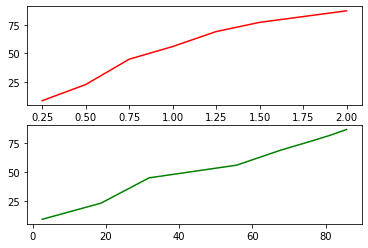

In [38]:
fig, axes = plt.subplots(2)
axes[0].plot(w_range, precision[:8], color="red")
axes[1].plot(fraction[:8], precision[:8], color="green")
plt.show()

In [40]:
nb_tables_range = np.array([i for i in range (1,7)])
for idx, nb_tables_values in enumerate(nb_tables_range):
    LSH_object = lsh.LSH(nb_projections=10, nb_tables=nb_tables_values, w=1, seed=0)
    LSH_object.fit(dataset_vectors_200d)
    exact_vectors_found = 0
    for probes_index in range (probes_size - 1):
        distances, matches, len_matches = LSH_object.kneighbors(probes_vectors[probes_index], k=k)
        #print(distances, matches, len_matches)
        results_hash[probes_index] = matches
        bf_matches, bf_distances = bf.knn_search(data = dataset_vectors_200d, query = probes_vectors[probes_index], k=k)
        results_brute_force[probes_index] = bf_matches
        if results_hash[probes_index] == results_brute_force[probes_index] : 
            exact_vectors_found += 1 
    precision[idx] =  exact_vectors_found * 100 / probes_size  
    fraction[idx] = len_matches * 100 / len(dataset_words_200d)
    print("Nombre de tables : ", nb_tables_values, "\nPrécision de la recherche en %: ", precision[idx], "\nFraction des données visitées : ", fraction[idx])

Nombre de tables :  1 
Précision de la recherche en %:  50.0 
Fraction des données visitées :  41.45774873491925
Nombre de tables :  2 
Précision de la recherche en %:  56.0 
Fraction des données visitées :  55.68896373239496
Nombre de tables :  3 
Précision de la recherche en %:  51.0 
Fraction des données visitées :  38.3358464425946
Nombre de tables :  4 
Précision de la recherche en %:  69.0 
Fraction des données visitées :  37.38349264601053
Nombre de tables :  5 
Précision de la recherche en %:  81.0 
Fraction des données visitées :  65.33812920680234
Nombre de tables :  6 
Précision de la recherche en %:  75.0 
Fraction des données visitées :  57.24916010714399


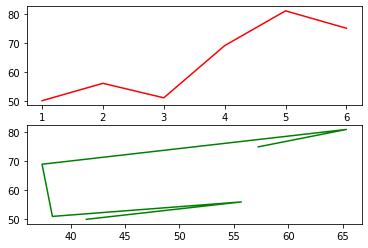

In [42]:
fig, axes = plt.subplots(2)
axes[0].plot(nb_tables_range, precision[:6], color="red")
axes[1].plot(fraction[:6], precision[:6], color="green")
plt.show()

In [ ]:
reduced_dataset_vectors = dataset_vectors_200d[:, 50]